In [2]:
import pandas as pd
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # lowercase 
    text = text.lower()
    #حremove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # remove numbers
    text = re.sub(r"\d+", "", text)
    # stopwords، و Lemmatization
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_review"] = df["Review"].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Melika\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Melika\AppData\Roaming\nltk_data...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.9, min_df=10, max_features=1000)
X = tfidf.fit_transform(df["clean_review"])


In [10]:
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score

scores = []
for n in range(2, 11):
    model = NMF(n_components=n, random_state=42)
    W = model.fit_transform(X)
    score = silhouette_score(W, model.labels_ if hasattr(model, 'labels_') else W.argmax(axis=1))
    scores.append((n, score))

best_n = max(scores, key=lambda x: x[1])[0]
print("Best number of topics:", best_n)


C:\Users\Melika\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Melika\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Melika\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Melika\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Best number of topics: 2


In [11]:
nmf_model = NMF(n_components=best_n, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

feature_names = tfidf.get_feature_names_out()

for topic_idx, topic in enumerate(H):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx+1}: {' | '.join(top_words)}")


Topic 1: stayed | night | breakfast | good | staff | stay | location | great | room | hotel
Topic 2: water | room | people | time | day | pool | food | nt | beach | resort


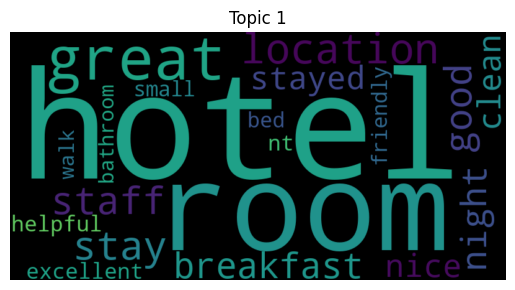

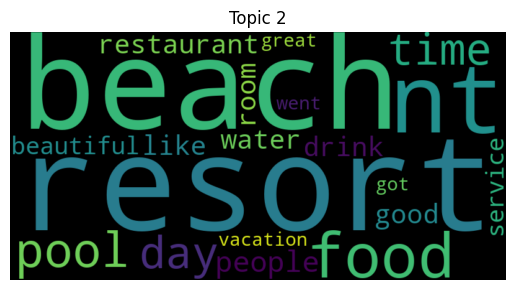

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(H):
    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx+1}")
    plt.show()


In [29]:
%pip install seaborn
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Melika\AppData\Local\Temp\ipykernel_7736\2404092165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, palette='viridis', x='Rating')


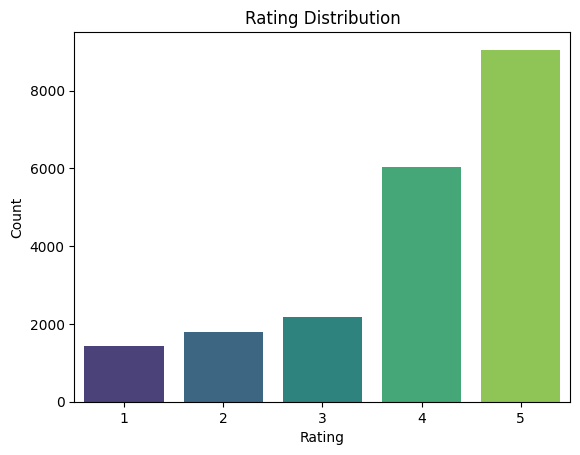

In [30]:
import matplotlib.pyplot as plt

sns.countplot(data=df, palette='viridis', x='Rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')    
plt.ylabel('Count')
plt.show()

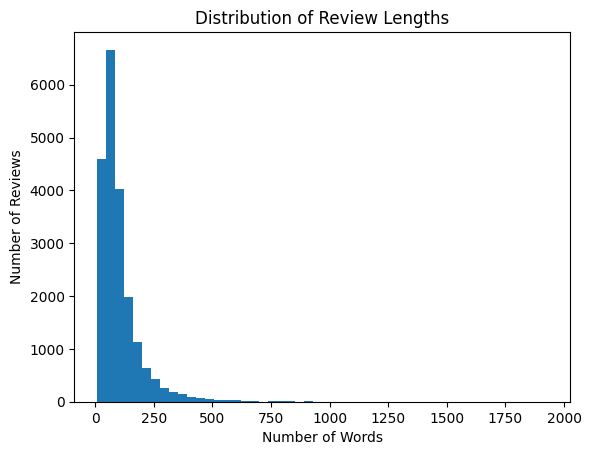

In [31]:
df['review_length'] = df['Review'].astype(str).apply(lambda x: len(x.split()))
df['review_length'].describe()
# lenghth of reviews

plt.hist(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

In [32]:
# positive reviews 4-5
print("Positive review example:")
print(df[df['Rating'] >= 4]['Review'].iloc[0])
# negative reviews 1-2
print("\nNegative review example:")
print(df[df['Rating'] <= 2]['Review'].iloc[0])


Positive review example:
nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  

Negative review example:
ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, e

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [34]:
text= df['Review'].astype(str).tolist()

In [35]:
remove=TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(1, 2))
tfidf=remove.fit_transform(text)
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2893237 stored elements and shape (20491, 237441)>

In [37]:
from sklearn.decomposition import NMF

In [38]:
nmf = NMF(n_components=10, random_state=42) 
nmf.fit(tfidf)

C:\Users\Melika\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

In [41]:

feature_names = remove.get_feature_names_out()


for topic_idx, topic in enumerate(nmf.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words = topic.argsort()[-10:][::-1]
    print(", ".join([feature_names[i] for i in top_words]))


Topic #1:
hotel, rooms, stayed hotel, star, stayed, hotel stayed, stay hotel, recommend hotel, star hotel, hotel staff

Topic #2:
resort, beach, food, pool, did, people, time, water, just, day

Topic #3:
room, did, night, bed, desk, told, floor, check, got, bathroom

Topic #4:
good, value, location, good value, good location, breakfast, nice, clean, value money, money

Topic #5:
great, great location, location, hotel great, great hotel, location great, great value, great staff, staff great, staff

Topic #6:
san, juan, san juan, old san, old, san francisco, francisco, el, puerto, rico

Topic #7:
service, view, excellent, hong, kong, hong kong, room service, best, hotels, club

Topic #8:
staff, helpful, friendly, stay, excellent, wonderful, perfect, friendly helpful, staff friendly, clean

Topic #9:
walk, station, train, city, metro, minutes, bus, minute, minute walk, 10

Topic #10:
nice, place, stay, parking, new, street, free, place stay, car, orleans


In [43]:
topic_labels = {
    0: "General Hotel Experience",
    1: "Leisure & Beach",
    2: "Room & Check-In Issues",
    3: "Value for Money",
    4: "Excellent Experience",
    5: "Destination: San Juan",
    6: "Services & Views",
    7: "Staff Friendliness",
    8: "Transit Access",
    9: "Parking & Driving"
}


In [46]:
# ...existing code...
# Assign each review to the topic with the highest score
top_topics = nmf.transform(tfidf).argmax(axis=1)

df['Topic Number'] = top_topics
df['Topic Label'] = df['Topic Number'].map(topic_labels)
# ...existing code...
df['Topic Number'] = top_topics


df['Topic Label'] = df['Topic Number'].map(topic_labels)

In [47]:
df[['Review', 'Topic Number', 'Topic Label']].head(10)


,Review,Topic Number,Topic Label
0,nice hotel expensive parking got good deal sta...,9,Parking & Driving
1,ok nothing special charge diamond member hilto...,2,Room & Check-In Issues
2,nice rooms not 4* experience hotel monaco seat...,2,Room & Check-In Issues
3,"unique, great stay, wonderful time hotel monac...",9,Parking & Driving
4,"great stay great stay, went seahawk game aweso...",2,Room & Check-In Issues
5,love monaco staff husband stayed hotel crazy w...,2,Room & Check-In Issues
6,"cozy stay rainy city, husband spent 7 nights m...",9,Parking & Driving
7,"excellent staff, housekeeping quality hotel ch...",6,Services & Views
8,"hotel stayed hotel monaco cruise, rooms genero...",2,Room & Check-In Issues
9,excellent stayed hotel monaco past w/e delight...,7,Staff Friendliness


In [48]:
topic_counts = df['Topic Label'].value_counts()